### 개발자 연봉 데이터 활용한 데이터 분석 및 시각화
- 개발자 연봉 데이터 활용해서 각각의 개발자 스킬, 연차, 성별, 지역별로 데이터를 분석해보자!
  - 각각의 컬럼별로 개발자의 연봉을 분석
 
1. 라이브러리 불러오기
2. 데이터 불러오기
3. 데이터 확인
4. 데이터 연산
5. 데이터 시각화

In [61]:
from matplotlib import rc
rc('font',family = 'Malgun Gothic')

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./data/Developer Salary.csv", encoding = 'euc-kr',index_col = "일련번호")
data.head()

,나이,학력,성별,정신건강,전문직,개발공부기간,연차,국적,연봉,보유기술개수
일련번호,,,,,,,,,,
DEV1,<35,Master,Man,No,Dev,15,6,Germany,77290,7
DEV2,<35,Undergraduate,Man,No,Dev,9,6,Canada,46135,13
DEV3,>35,Master,Man,No,Dev,26,18,Germany,77831,17
DEV4,>35,Undergraduate,Man,No,Dev,39,21,United Kingdom of Great Britain and Northern I...,68507,3
DEV5,<35,Master,Man,No,Dev,19,10,Germany,60535,5


In [3]:
data.shape

(33466, 10)

In [4]:
data.columns

Index(['나이', '학력', '성별', '정신건강', '전문직', '개발공부기간', '연차', '국적', '연봉', '보유기술개수'], dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33466 entries, DEV1 to DEV33466
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   나이      33466 non-null  object
 1   학력      33466 non-null  object
 2   성별      33466 non-null  object
 3   정신건강    33466 non-null  object
 4   전문직     33466 non-null  object
 5   개발공부기간  33466 non-null  int64 
 6   연차      33466 non-null  int64 
 7   국적      33466 non-null  object
 8   연봉      33466 non-null  int64 
 9   보유기술개수  33466 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 2.8+ MB


> **데이터 살펴보기**
 
 
* 일련번호
* 나이 (<35, >35) : 35세 미만 or 35세 이상
* 학력 (Undergraduate : 학사, Master : 석사, phD : 박사, NoHigherEd : 고등학교 졸업, Other : 그 외)
* 성별 (Man, Woman, NonBinary) : 남자, 여자, 제 3의 성
* 정신건강 (Yes : 건강, No : 병력있음)
* 전문직 : 전문개발자가 맞는지 (삭제예정)
* 개발공부기간 : 코딩을 공부한 기간(수치형)
* 연차 : 개발자로써 일을 한 기간(수치형)
* 국적 : 독일, 캐나다, 영국, 미국, 인도, 일본, 한국
* 연봉 : 1년간 받는 급여(달러)
* 보유기술개수 : 해당 사람이 다룰 수 있는 기술의 개수(수치형)

- 연봉데이터를 활용해서 월급 column을 추가 > 원화로 계산 (환율 1440원)

In [22]:
data.drop(["월급"],axis = 1,inplace=True)

In [23]:
data.insert(loc = 9, column = "월급" , value = (data[['연봉']]/12*1440).round(1))

In [24]:
data

,나이,학력,성별,정신건강,전문직,개발공부기간,연차,국적,연봉,월급,보유기술개수
일련번호,,,,,,,,,,,
DEV1,<35,Master,Man,No,Dev,15,6,Germany,77290,9274800.0,7
DEV2,<35,Undergraduate,Man,No,Dev,9,6,Canada,46135,5536200.0,13
DEV3,>35,Master,Man,No,Dev,26,18,Germany,77831,9339720.0,17
DEV4,>35,Undergraduate,Man,No,Dev,39,21,United Kingdom of Great Britain and Northern I...,68507,8220840.0,3
DEV5,<35,Master,Man,No,Dev,19,10,Germany,60535,7264200.0,5
...,...,...,...,...,...,...,...,...,...,...,...
DEV33462,<35,Master,Man,Yes,Dev,7,5,United States of America,94000,11280000.0,5
DEV33463,<35,Undergraduate,Man,No,Dev,7,2,Germany,41058,4926960.0,13
DEV33464,>35,Undergraduate,Man,No,Dev,21,16,United States of America,115000,13800000.0,11


In [25]:
data.describe()

,개발공부기간,연차,연봉,월급,보유기술개수
count,33466.000000,33466.000000,33466.000000,3.346600e+04,33466.000000
mean,15.160103,9.765523,89023.017988,1.068276e+07,13.230025
std,10.092218,8.609730,53306.941978,6.396833e+06,6.840151
min,0.000000,0.000000,1.000000,1.200000e+02,0.000000
25%,8.000000,4.000000,50000.000000,6.000000e+06,8.000000
50%,12.000000,7.000000,82890.000000,9.946800e+06,12.000000
75%,20.000000,14.000000,125639.000000,1.507668e+07,17.000000
max,50.000000,50.000000,224000.000000,2.688000e+07,105.000000


- object 값의 기술통계

In [28]:
data.describe(include = 'object')

,나이,학력,성별,정신건강,전문직,국적
count,33466,33466,33466,33466,33466,33466
unique,2,5,3,2,2,7
top,<35,Undergraduate,Man,No,Dev,United States of America
freq,20746,19232,30848,24532,30588,14696


In [29]:
data['성별'].value_counts()

성별
Man          30848
Woman         1870
NonBinary      748
Name: count, dtype: int64

1. 개발자 전체 평균 월급 계산하기
2. 국적별 평균 월급 계산하기
3. 학력별 평균월급 계산하기
4. 성별 평균 월급 계산하ㅣ

In [36]:
data['월급'].mean().round()

np.float64(10682762.0)

- 한국 국적의 개발자 평균월급 계사

In [38]:
data['국적'].unique()

array(['Germany', 'Canada',
       'United Kingdom of Great Britain and Northern Ireland',
       'United States of America', 'India', 'Japan', 'South Korea'],
      dtype=object)

In [40]:
kr_data = data[data['국적'] == 'South Korea']
kr_data

,나이,학력,성별,정신건강,전문직,개발공부기간,연차,국적,연봉,월급,보유기술개수
일련번호,,,,,,,,,,,
DEV346,<35,Master,Man,No,Dev,10,5,South Korea,40248,4829760.0,8
DEV449,>35,Undergraduate,Man,No,Dev,14,9,South Korea,39201,4704120.0,18
DEV2295,<35,Undergraduate,Man,No,NotDev,14,4,South Korea,45276,5433120.0,6
DEV2393,<35,NoHigherEd,Man,No,Dev,4,1,South Korea,20121,2414520.0,9
DEV2459,<35,Undergraduate,Man,No,Dev,9,4,South Korea,41919,5030280.0,16
...,...,...,...,...,...,...,...,...,...,...,...
DEV32659,<35,Undergraduate,Man,No,Dev,5,5,South Korea,44,5280.0,24
DEV33056,<35,NoHigherEd,Man,Yes,Dev,8,6,South Korea,59366,7123920.0,20
DEV33062,>35,Master,Woman,No,Dev,25,21,South Korea,110817,13298040.0,19


In [44]:
kr_data['월급'].mean().round()

np.float64(5697143.0)

In [86]:
#2.국적별 평균 월급
country_mean_data = data.groupby('국적')['월급'].mean().round()

In [55]:
data[['국적','월급']].groupby('국적').mean().round()

,월급
국적,
Canada,10362339.0
Germany,8384982.0
India,2906082.0
Japan,7831043.0
South Korea,5697143.0
United Kingdom of Great Britain and Northern Ireland,9734044.0
United States of America,14853122.0


In [85]:
country_mean_data.index

Index(['Canada', 'Germany', 'India', 'Japan', 'South Korea',
       'United Kingdom of Great Britain and Northern Ireland',
       'United States of America'],
      dtype='object', name='국적')

In [89]:
sorted(country_mean_data.values)

[np.float64(2906082.0),
 np.float64(5697143.0),
 np.float64(7831043.0),
 np.float64(8384982.0),
 np.float64(9734044.0),
 np.float64(10362339.0),
 np.float64(14853122.0)]

Text(0, 0.5, '국가')

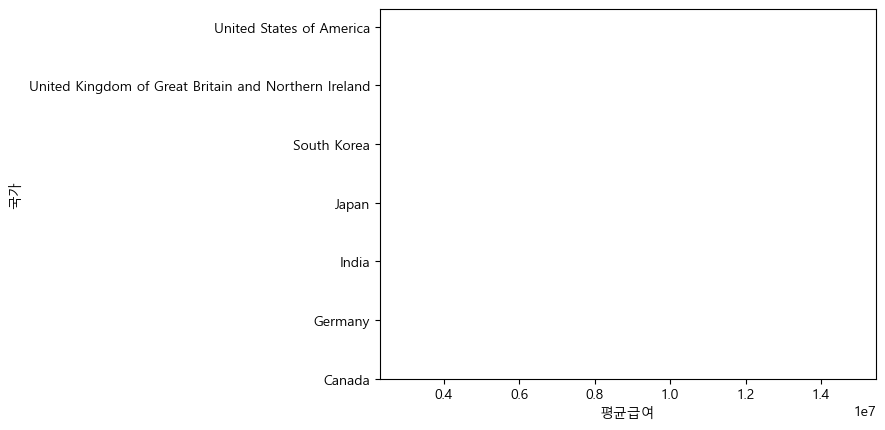

In [79]:
plt.bar(country_mean_data.values,country_mean_data.index,data = country_mean_data.values)
plt.xlabel("평균급여")
plt.ylabel("국가")

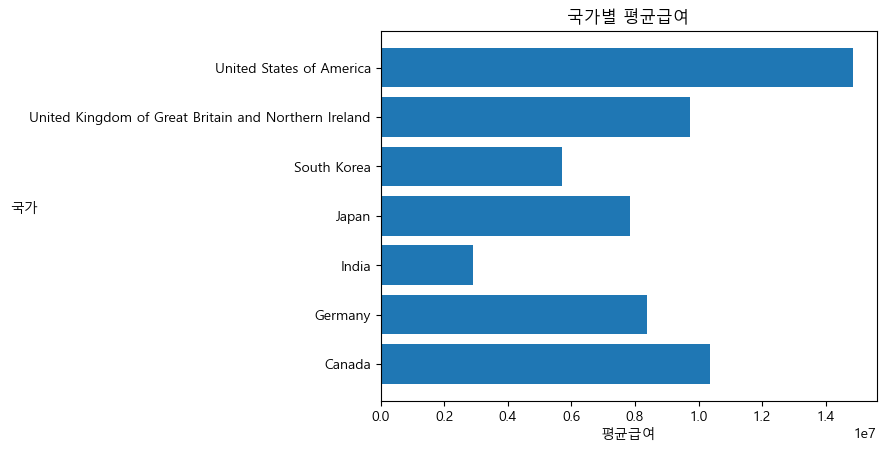

In [93]:
plt.barh(country_mean_data.index,country_mean_data.values)
plt.xlabel("평균급여")
plt.ylabel("국가",rotation = 0)
#plt.xticks(rotation = 90)
plt.title("국가별 평균급여");

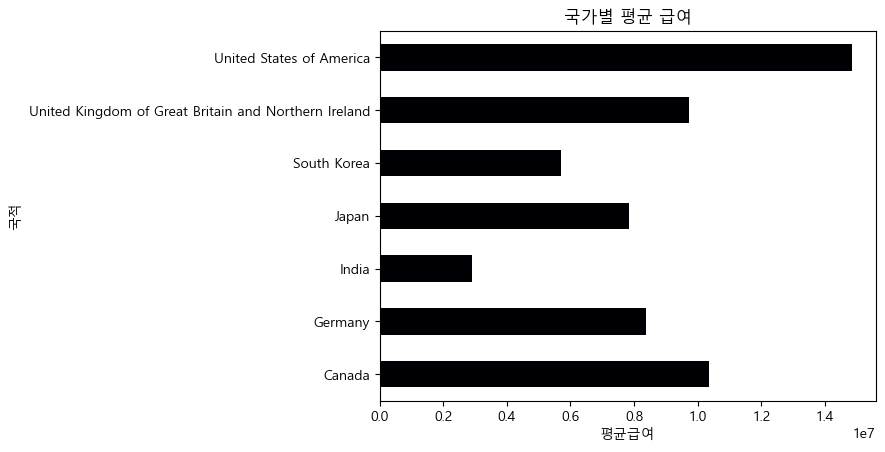

In [98]:
# 판다스 내장 그래프
country_mean_data.plot(kind='barh',title = "국가별 평균 급여",xlabel = "평균급여",ylabel="국적",colormap='magma');

In [99]:
#3. 학력별 평균 월급
edu_level_mean = data.groupby('학력')['월급'].mean().round()

In [101]:
edu_level_mean

학력
Master           11076970.0
NoHigherEd        8838012.0
Other            10849317.0
PhD              12627391.0
Undergraduate    10488263.0
Name: 월급, dtype: float64

<Axes: ylabel='학력'>

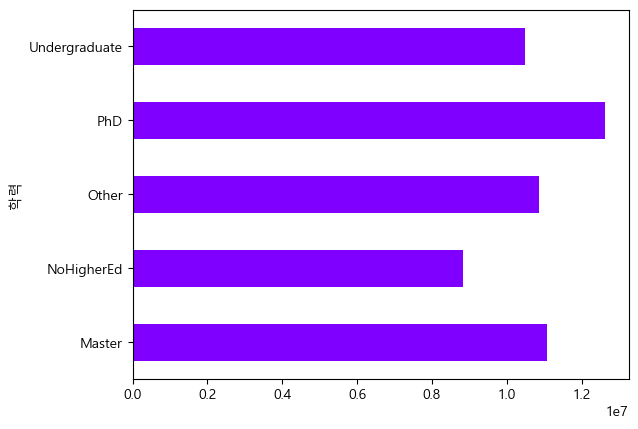

In [113]:
edu_level_mean.plot(kind = 'barh',colormap='rainbow',rot = 0)

<BarContainer object of 5 artists>

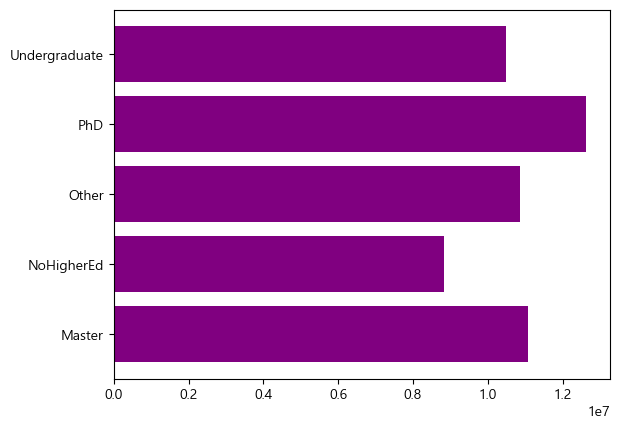

In [117]:
plt.barh(edu_level_mean.index,edu_level_mean.values,color = "purple")

In [131]:
data[['성별','학력','월급']].groupby(['성별','학력']).mean().round()

월급
성별        학력                       
Man       Master         11086075.0
          NoHigherEd      8896579.0
          Other          10918964.0
          PhD            12782646.0
          Undergraduate  10484559.0
NonBinary Master         11660533.0
          NoHigherEd      7913358.0
          Other          10014433.0
          PhD            11139036.0
          Undergraduate  11460453.0
Woman     Master         10763452.0
          NoHigherEd      8207424.0
          Other           9890915.0
          PhD            10964523.0
          Undergraduate  10192232.0

In [122]:
grade_mean = data[['월급','학력']].groupby(by= '학력').mean().round()

In [123]:
grade_mean.index

Index(['Master', 'NoHigherEd', 'Other', 'PhD', 'Undergraduate'], dtype='object', name='학력')

In [128]:
grade_mean['월급'].values

array([11076970.,  8838012., 10849317., 12627391., 10488263.])

In [46]:
# 4. 성별 평균 월급 구하기
data.groupby('성별')['월급'].mean().round()

성별
Man          10698052.0
NonBinary    11035257.0
Woman        10289542.0
Name: 월급, dtype: float64

In [47]:
data['성별'].value_counts()

성별
Man          30848
Woman         1870
NonBinary      748
Name: count, dtype: int64

In [132]:
gender_mean = data[['성별','월급']].groupby('성별').mean().round()

(10000000.0, 12000000.0)

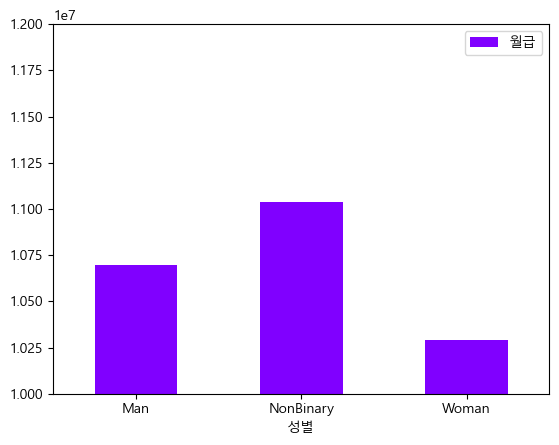

In [140]:
gender_mean.plot(kind='bar',colormap = 'rainbow',rot = 0)
plt.ylim(1.0e7,1.2e7) #지수로 표현해서 확인할 수 있음.

- pandas의 내장함수 plot을 사용하더라도 matplotlib의 ylim 같은 기능들을 활용할 수 있음

---
- 학력별 인원 수를 pie그래프로 작성해보기

In [145]:
grade_count = data['학력'].value_counts()

In [157]:
grade_count

학력
Undergraduate    19232
Master            7442
Other             4157
NoHigherEd        1322
PhD               1313
Name: count, dtype: int64

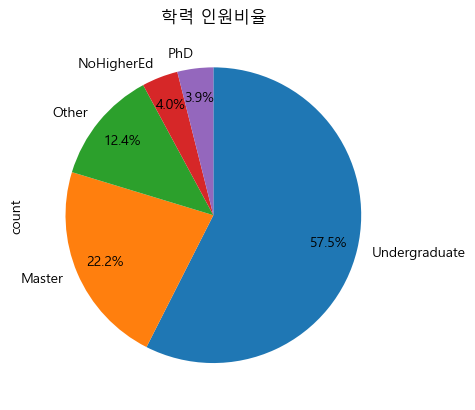

In [163]:
grade_count.plot(kind = 'pie',
                 autopct = "%.1f%%",
                title = "학력 인원비율",
                startangle = 90, # 시작하는 각도 조정
                counterclock = False, # 시계방향시작
                pctdistance = 0.80 # 내부의 글자 겹침문제를 위해 띄어주는 역할 
                );

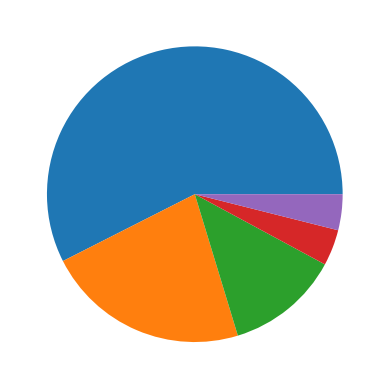

In [165]:
plt.pie(grade_count);

### 멀티인덱스
- 2개 이상의 column을 동시에 인덱스로 갖는 경우

- 성별-> 학력 -> 평균 월급 으로 나눈기
(여자 중에서 석사인 사람의 평균월급 )





In [172]:
gender_by_grade_data = data[['성별','학력','월급']].groupby(['성별','학력']).mean().round()
gender_by_grade_data 

월급
성별        학력                       
Man       Master         11086075.0
          NoHigherEd      8896579.0
          Other          10918964.0
          PhD            12782646.0
          Undergraduate  10484559.0
NonBinary Master         11660533.0
          NoHigherEd      7913358.0
          Other          10014433.0
          PhD            11139036.0
          Undergraduate  11460453.0
Woman     Master         10763452.0
          NoHigherEd      8207424.0
          Other           9890915.0
          PhD            10964523.0
          Undergraduate  10192232.0

### seaborn 라이브러리
- 파이썬의 데이터시각화 라이브러리
- 통계적 그래프를 쉽게 그릴 수 있음
- matplotlib을 기반, but 좀 더 간편한 시각화 제공, 사용법 간편

In [173]:
import seaborn as sns

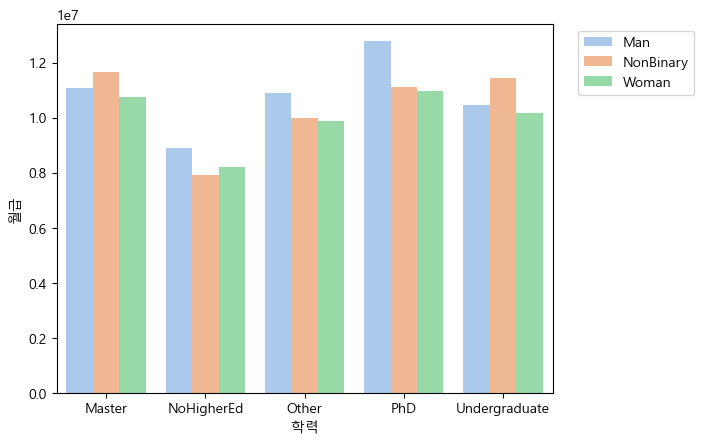

In [181]:
sns.barplot(data = gender_by_grade_data, x = "학력", y = "월급", hue = "성별", palette='pastel')
plt.legend(loc = 'upper right',bbox_to_anchor =(1.3,1))

- x,y,hue 를 어떻게 지정할지가 중요!

In [186]:
# 나이 국적 평균월급 구하기
age_by_country = data[['나이','국적','월급']].groupby(['나이','국적']).mean().round()
age_by_country

월급
나이  국적                                                            
<35 Canada                                               9433729.0
    Germany                                              7333223.0
    India                                                2688426.0
    Japan                                                6742367.0
    South Korea                                          4970957.0
    United Kingdom of Great Britain and Northern Ir...   8665066.0
    United States of America                            13579396.0
>35 Canada                                              11650746.0
    Germany                                             10083702.0
    India                                                5050042.0
    Japan                                                9284709.0
    South Korea                                          7797195.0
    United Kingdom of Great Britain and Northern Ir...  11094230.0
    United States of America                            16362428.0

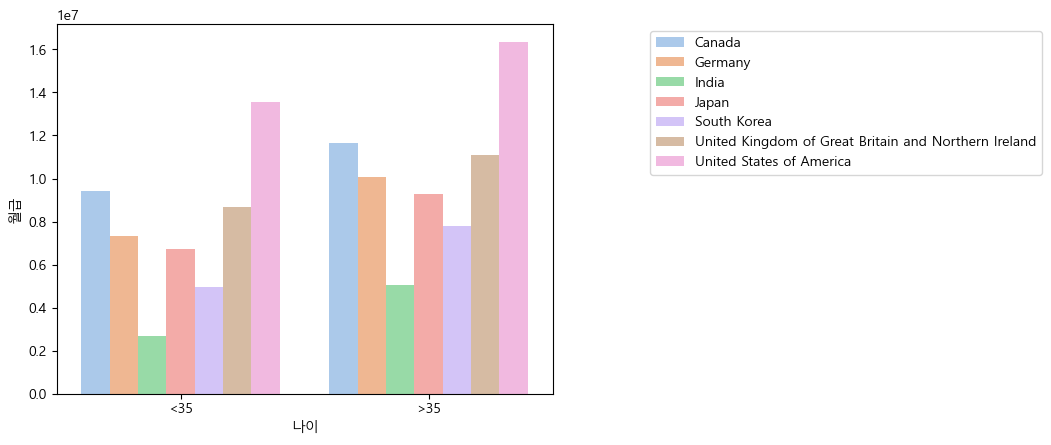

In [195]:
sns.barplot(age_by_country, x = '나이',y = '월급', hue = '국적',palette = 'pastel') #나이 기준의 각 국가별 평균 월급
plt.legend(loc = 'upper right',bbox_to_anchor =(2,1))

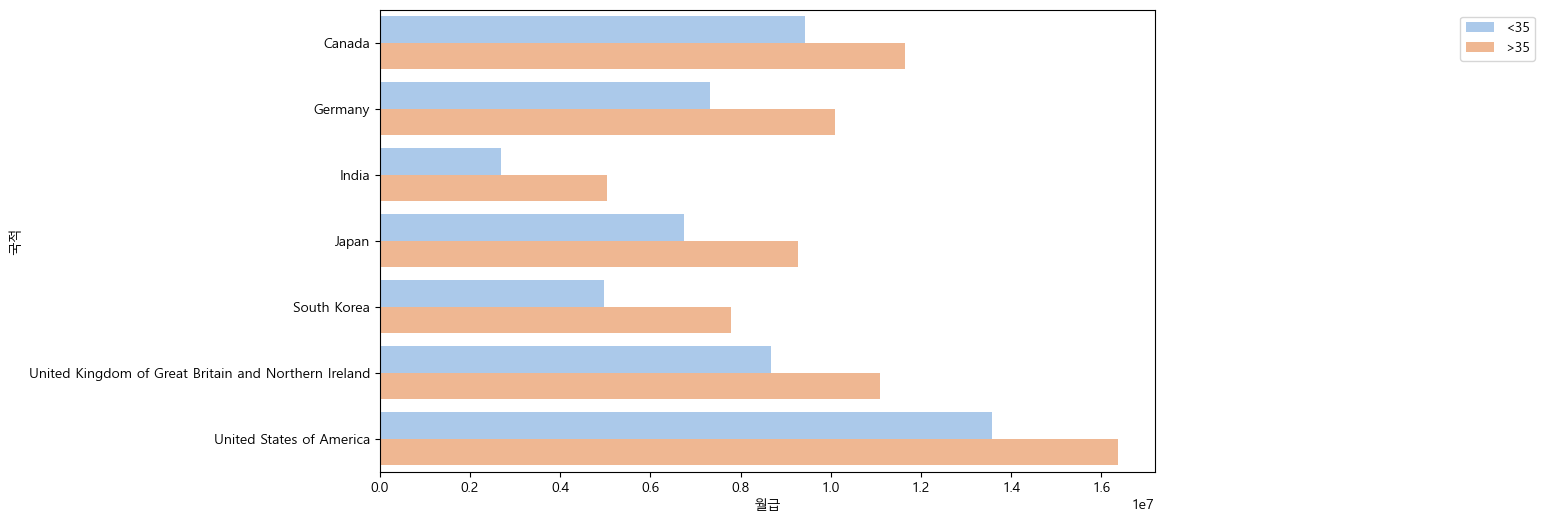

In [205]:
plt.figure(figsize=(10,6))
sns.barplot(age_by_country, x = '월급',y = '국적', hue = '나이',palette = 'pastel') # 각 국가의 나이별 평균 월급 (orient=h 이면 x,y는 바뀌어야함)
plt.legend(loc = 'upper right',bbox_to_anchor =(1.5,1))

- 나이별로 각 국가의 평균 월급은 나이가 많을 수록 모든 국가가 평균이 더 높다는 것을 알 수 있음 > 각 국가별의 월급 패턴은 유사함
- hue : 범주를 구분해주는 변수가 들어가는 것이 의미가 있음

---
국적별 연차에 따른 월급 시각화>lineplot

In [206]:
data.columns

Index(['나이', '학력', '성별', '정신건강', '전문직', '개발공부기간', '연차', '국적', '연봉', '월급',
       '보유기술개수'],
      dtype='object')

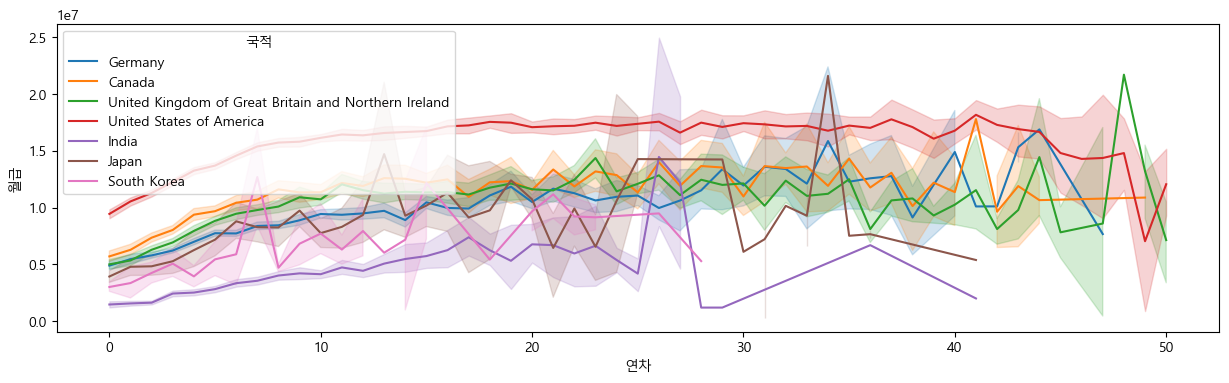

In [208]:
plt.figure(figsize=(15,4))
sns.lineplot(data = data, x = "연차", y = "월급" , hue = "국적");

- 연한색으로 표현한 부분 > 신뢰구간(각 선 = 평균값에 대한 변동성 혹은 불확실성)을 표현

---
국적, 학력 기준으로 최소, 최대, 평균, 중앙값

---
육군신체데이터 정보 활용 > 결측값 다루기!

In [212]:
# 한글데이터 > 인코딩 필요 
# 인코딩 감지 후 데이터 읽어오기

import chardet # 인코딩 감지 라이브러리
with open('data/육군신체측정정보.csv','rb') as f: # 파일 열기
    data = f.read() # 파일 읽어서 변수 저장
chardet.detect(data) # 인코딩 분석

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}

In [285]:
data = pd.read_csv("data/육군신체측정정보.csv", encoding = "utf-8" , index_col="순번") #index_col : 인덱스 재정의
data.head()

C:\Users\ChoiSeokjin\AppData\Local\Temp\ipykernel_27708\1605579753.py:1: DtypeWarning: Columns (2,3,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/육군신체측정정보.csv", encoding = "utf-8" , index_col="순번") #index_col : 인덱스 재정의


,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램
순번,,,,,,,,,
1,20140106,96.3,92.6,185.5 cm,82.5,83.8,57.1,28.5,73.2 kg
2,2013,101.9,83.8,167.2 cm,81.2,74.4,55.0,24.2,65.1 kg
3,20140106,99.5,89.6,179.9 cm,99.2,84.2,56.3,28.1,93.2 kg
4,2013,98.6,85.5,171.4 cm,85.9,76.4,54.5,27.4,71.6 kg
5,20140106,94.7,88.1,176.9 cm,78.3,79.7,58.5,26.5,67.1 kg


In [214]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167983 entries, 1 to 167983
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   측정 일자       167983 non-null  int64 
 1   가슴 둘레 센티미터  167982 non-null  object
 2   소매길이 센티미터   167983 non-null  object
 3   신장 센티미터     167983 non-null  object
 4   허리 둘레 센티미터  167983 non-null  object
 5   샅높이 센티미터    167983 non-null  object
 6   머리 둘레 센티미터  167981 non-null  object
 7   발 길이 센티미터   167983 non-null  object
 8   몸무게 킬로그램    167983 non-null  object
dtypes: int64(1), object(8)
memory usage: 12.8+ MB


In [286]:
height = data['신장 센티미터'].str.replace(" cm","").astype(float)/100

In [287]:
weight = data['몸무게 킬로그램'].str.replace(" kg","").astype(float)

In [288]:
BMI = weight/height**2
BMI.round(2)

순번
1         21.27
2         23.29
3         28.80
4         24.37
5         21.44
          ...  
167979    24.57
167980    25.56
167981    25.64
167982    19.05
167983    16.73
Length: 167983, dtype: float64

In [289]:
data['BMI'] = BMI.round(2)

In [290]:
data

,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램,BMI
순번,,,,,,,,,,
1,20140106,96.3,92.6,185.5 cm,82.5,83.8,57.1,28.5,73.2 kg,21.27
2,2013,101.9,83.8,167.2 cm,81.2,74.4,55.0,24.2,65.1 kg,23.29
3,20140106,99.5,89.6,179.9 cm,99.2,84.2,56.3,28.1,93.2 kg,28.80
4,2013,98.6,85.5,171.4 cm,85.9,76.4,54.5,27.4,71.6 kg,24.37
5,20140106,94.7,88.1,176.9 cm,78.3,79.7,58.5,26.5,67.1 kg,21.44
...,...,...,...,...,...,...,...,...,...,...
167979,20170131,100.6 cm,86.4 cm,173.2 cm,86.7 cm (34.1 in),77.1 cm,56.9 cm,27.1 cm,73.7 kg,24.57
167980,20170131,97.9 cm,82.7 cm,166.3 cm,90.5 cm (35.6 in),73.4 cm,61.5 cm,28.8 cm,70.7 kg,25.56
167981,20170131,97.9 cm,87.2 cm,175.2 cm,94.3 cm (37.1 in),83.1 cm,57.1 cm,27.6 cm,78.7 kg,25.64


### 결측치 처리하기
- isnull > 데이터 안에 결측치가 존재하는 지 확인할 수 있는 함수
- 평균값, 최빈값, 중앙값
- 삭제!

In [232]:
data.isnull().sum()

측정 일자         0
가슴 둘레 센티미터    1
소매길이 센티미터     0
신장 센티미터       0
허리 둘레 센티미터    0
샅높이 센티미터      0
머리 둘레 센티미터    2
발 길이 센티미터     0
몸무게 킬로그램      0
BMI           0
dtype: int64

In [240]:
data[data['가슴 둘레 센티미터'].isnull()]

,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램,BMI
순번,,,,,,,,,,
108401,20160307,NaN,85.9,171.3 cm,91.7,79.0,57.1,25.2,69.5 kg,23.68


In [247]:
data['가슴 둘레 센티미터']

순번
1             96.3
2            101.9
3             99.5
4             98.6
5             94.7
            ...   
167979    100.6 cm
167980     97.9 cm
167981     97.9 cm
167982     85.3 cm
167983     86.6 cm
Name: 가슴 둘레 센티미터, Length: 167983, dtype: object

- 사용자 함수를 통해 데이터에 적용하여 'cm'가 붙어있지 않으면 패스, 붙어있지 않으면 공백으로 대체

In [252]:
def cm_replace1(data):
    if data in " cm" :
        return data.replace(" cm"," ")
    else:
        return data

In [253]:
data['가슴 둘레 센티미터'].apply(cm_replace1)

TypeError: 'in <string>' requires string as left operand, not float

- 기존의 float형이면 string으로 처리하므로 사용자함수를 위와같이 작성하면 안됨

In [291]:
def cm_replace(data):
    if type(data) == float:
        return data
    else:
        return data.replace(" cm","")

In [294]:
mean = data['가슴 둘레 센티미터'].apply(cm_replace).astype(float).mean().round(1)

- 따라서 type을 확인해서 cm를 뗄지 말지를 결정해야함!!

In [299]:
data['가슴 둘레 센티미터'] = data['가슴 둘레 센티미터'].apply(cm_replace).astype(float)

In [300]:
data['가슴 둘레 센티미터'].fillna(mean)

순번
1          96.3
2         101.9
3          99.5
4          98.6
5          94.7
          ...  
167979    100.6
167980     97.9
167981     97.9
167982     85.3
167983     86.6
Name: 가슴 둘레 센티미터, Length: 167983, dtype: float64

In [302]:
data[data['가슴 둘레 센티미터'].isnull()]

,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램,BMI
순번,,,,,,,,,,
108401,20160307,NaN,85.9,171.3 cm,91.7,79.0,57.1,25.2,69.5 kg,23.68


In [303]:
data['가슴 둘레 센티미터'] = data['가슴 둘레 센티미터'].fillna(mean)

- fillna를 해준다음 해당 값을 대입해줘야함 or
```
fillna(inplace = True)
```

- 머리 둘레 센티미터 : 삭제하고자 함
> 결측치있는 행을 일괄적으로 삭제하는 함수 : dropna

In [308]:
data.dropna(inplace = True)

In [310]:
data.isnull().sum()

측정 일자         0
가슴 둘레 센티미터    0
소매길이 센티미터     0
신장 센티미터       0
허리 둘레 센티미터    0
샅높이 센티미터      0
머리 둘레 센티미터    0
발 길이 센티미터     0
몸무게 킬로그램      0
BMI           0
dtype: int64

- 아예 함수 자체에서 astype을 통해 형을 변환해준다면?

In [273]:
def cm_replace2(data):
    if type(data) == float:
        return data
    else:
        data = data.replace(" cm","")
        return data.astype(float)

In [274]:
data['가슴 둘레 센티미터'].apply(cm_replace2)

AttributeError: 'str' object has no attribute 'astype'

- 여기서 data는 행 전체가 아니라 string 각각의 값이 전달되므로, astype은 사용할 수 없음. (astype은 pandas 데이터에만 사용)
- 따라서 float()를 활용해 데이터값을 float형으로 변환시켜야함!

In [275]:
def cm_replace2(data):
    if type(data) == float:
        return data
    else:
        data = data.replace(" cm","")
        return float(data)

In [278]:
data['가슴 둘레 센티미터'].apply(cm_replace2).mean().round(1)

np.float64(95.6)

In [280]:
data['가슴 둘레 센티미터'] = data['가슴 둘레 센티미터'].apply(cm_replace2)

In [281]:
data['가슴 둘레 센티미터'].fillna(data['가슴 둘레 센티미터'].apply(cm_replace2).mean().round(1))

순번
1          96.3
2         101.9
3          99.5
4          98.6
5          94.7
          ...  
167979    100.6
167980     97.9
167981     97.9
167982     85.3
167983     86.6
Name: 가슴 둘레 센티미터, Length: 167983, dtype: float64


---
개인적으로 데이터 확인

In [6]:
data['학력'].value_counts()

학력
Undergraduate    19232
Master            7442
Other             4157
NoHigherEd        1322
PhD               1313
Name: count, dtype: int64

In [7]:
data['성별'].value_counts()

성별
Man          30848
Woman         1870
NonBinary      748
Name: count, dtype: int64

In [8]:
data['전문직'].unique()

array(['Dev', 'NotDev'], dtype=object)

In [9]:
data['개발공부기간'].min(),data['개발공부기간'].max()

(0, 50)

In [10]:
data['연차'].value_counts().sort_index()

연차
0     1295
1     1506
2     2622
3     2846
4     2539
5     2724
6     2177
7     1871
8     1739
9     1091
10    2110
11     863
12    1035
13     639
14     643
15    1131
16     537
17     427
18     446
19     234
20     933
21     367
22     478
23     317
24     280
25     585
26     210
27     150
28     148
29      87
30     313
31      87
32     130
33      91
34      89
35     156
36     101
37      66
38      62
39      35
40     111
41      39
42      37
43      30
44      25
45      18
46       8
47       9
48       6
49       6
50      17
Name: count, dtype: int64

In [11]:
data['국적'].value_counts()

국적
United States of America                                14696
Germany                                                  5395
India                                                    5360
United Kingdom of Great Britain and Northern Ireland     4688
Canada                                                   2779
Japan                                                     404
South Korea                                               144
Name: count, dtype: int64

In [12]:
data['연봉'].min(),data['연봉'].max()

(1, 224000)

In [13]:
data.corr(numeric_only=True)

,개발공부기간,연차,연봉,보유기술개수
개발공부기간,1.000000,0.902706,0.374012,-0.025247
연차,0.902706,1.000000,0.390871,-0.022888
연봉,0.374012,0.390871,1.000000,0.072576
보유기술개수,-0.025247,-0.022888,0.072576,1.000000


In [14]:
data.groupby('국적')['연봉'].mean()

국적
Canada                                                   86352.826556
Germany                                                  69874.848934
India                                                    24217.351306
Japan                                                    65258.690594
South Korea                                              47476.194444
United Kingdom of Great Britain and Northern Ireland     81117.030503
United States of America                                123776.012520
Name: 연봉, dtype: float64

In [17]:
data.groupby('연차')['연봉'].mean()

연차
0      47021.222394
1      52861.264940
2      57266.227307
3      64919.323261
4      72915.859000
5      79474.134361
6      85379.654111
7      89336.572421
8      93454.100058
9      97203.001833
10    100964.702844
11    103876.293163
12    104281.305314
13    107256.070423
14    109293.860031
15    111782.044209
16    116076.515829
17    111824.348946
18    119879.367713
19    123056.405983
20    115771.219721
21    120636.814714
22    121170.420502
23    126567.876972
24    120731.410714
25    122411.266667
26    130246.947619
27    121298.333333
28    128824.831081
29    129624.908046
30    128183.380192
31    127690.229885
32    128363.207692
33    125940.758242
34    118020.168539
35    130730.608974
36    121108.851485
37    127918.030303
38    120523.935484
39    122226.542857
40    127314.009009
41    136396.871795
42    127654.729730
43    125450.333333
44    133516.360000
45    116975.111111
46    119125.000000
47     97572.111111
48    132989.000000
49     89755.1666

In [19]:
data[['성별','연봉']].groupby('성별').mean()

,연봉
성별,
Man,89150.431665
NonBinary,91960.477273
Woman,85746.185561


In [20]:
data['성별'].unique()

array(['Man', 'Woman', 'NonBinary'], dtype=object)